<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">
  
# Data Overview

This project will analyze various datasets to forecast interest rates for 60-month auto loans. Each dataset includes different metrics, each with its frequency and units of measurement. Understanding these details is crucial for proper data handling and analysis.

## Domestic Auto Production
- **Units**: Thousands of Units
- **Adjustment**: Seasonally Adjusted
- **Frequency**: Monthly

## Domestic Auto Inventories
- **Units**: Thousands of Units
- **Adjustment**: Seasonally Adjusted
- **Frequency**: Monthly

## Federal Funds Effective Rate
- **Units**: Percent
- **Adjustment**: Not Seasonally Adjusted
- **Frequency**: Monthly

## Unemployment Rate
- **Units**: Percent
- **Adjustment**: Seasonally Adjusted
- **Frequency**: Monthly

## Gross Domestic Product (GDP)
- **Units**: Billions of Dollars
- **Adjustment**: Seasonally Adjusted Annual Rate
- **Frequency**: Quarterly

## 30-year Breakeven Inflation Rate
- **Units**: Percent
- **Adjustment**: Seasonally Adjusted
- **Frequency**: Monthly

## Total Vehicle Sales
- **Units**: Millions of Units
- **Adjustment**: Seasonally Adjusted Annual Rate
- **Frequency**: Monthly

## Finance Rate on Consumer Installment Loans at Commercial Banks, New Autos 60-Month Loan
- **Units**: Percent
- **Adjustment**: Not Seasonally Adjusted
- **Frequency**: Monthly

</div>


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from pmdarima import auto_arima
from functools import reduce
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

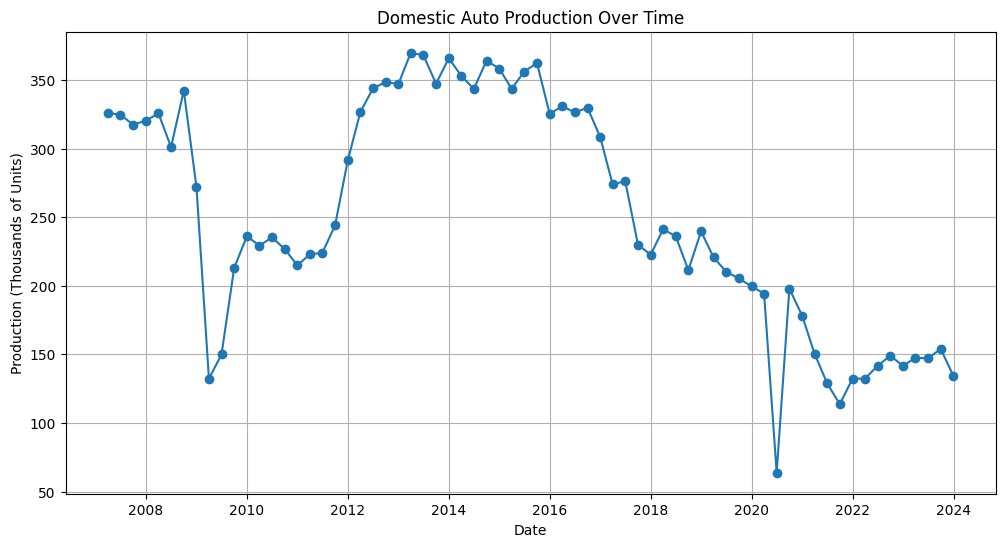

Auto_Production    0
dtype: int64

,Auto_Production
count,68.000000
mean,252.073529
std,83.164715
min,63.733333
25%,196.991667
50%,237.916667
75%,327.358333
max,369.833333


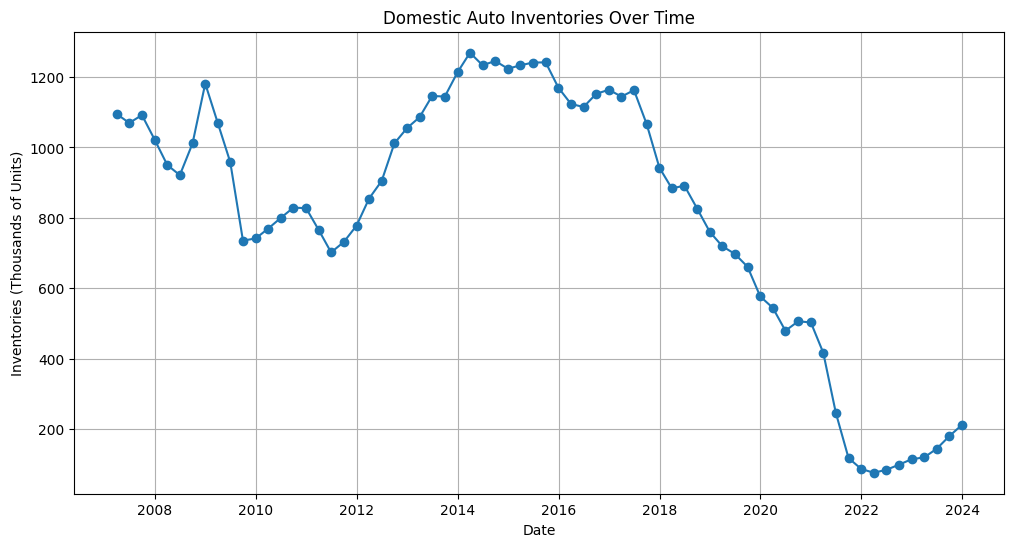

Auto_Inventory    0
dtype: int64

,Auto_Inventory
count,68.000000
mean,810.784074
std,367.580028
min,75.821000
25%,639.753500
50%,887.453667
75%,1116.925000
max,1268.966667


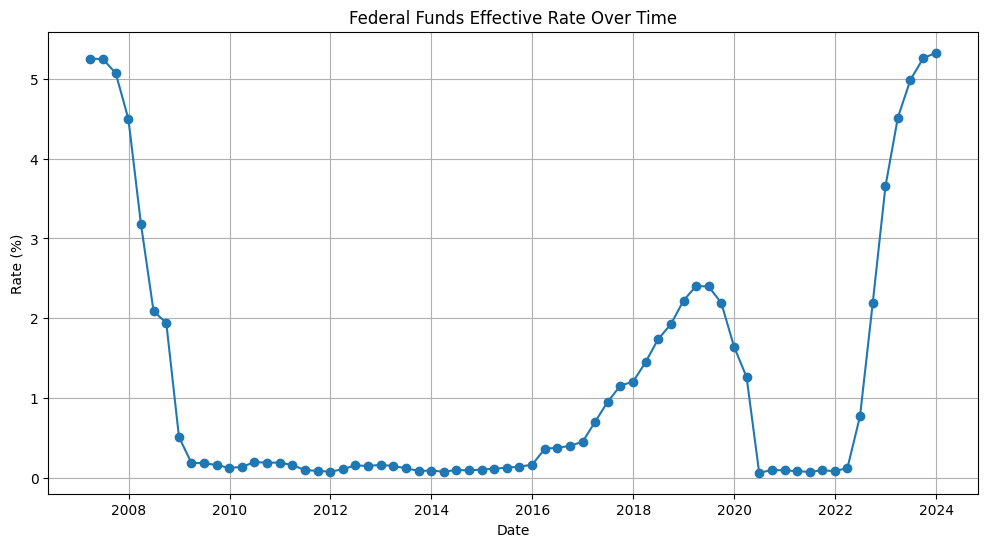

FEDFUNDS    0
dtype: int64

,FEDFUNDS
count,68.000000
mean,1.200147
std,1.645877
min,0.060000
25%,0.108333
50%,0.186667
75%,1.927500
max,5.330000


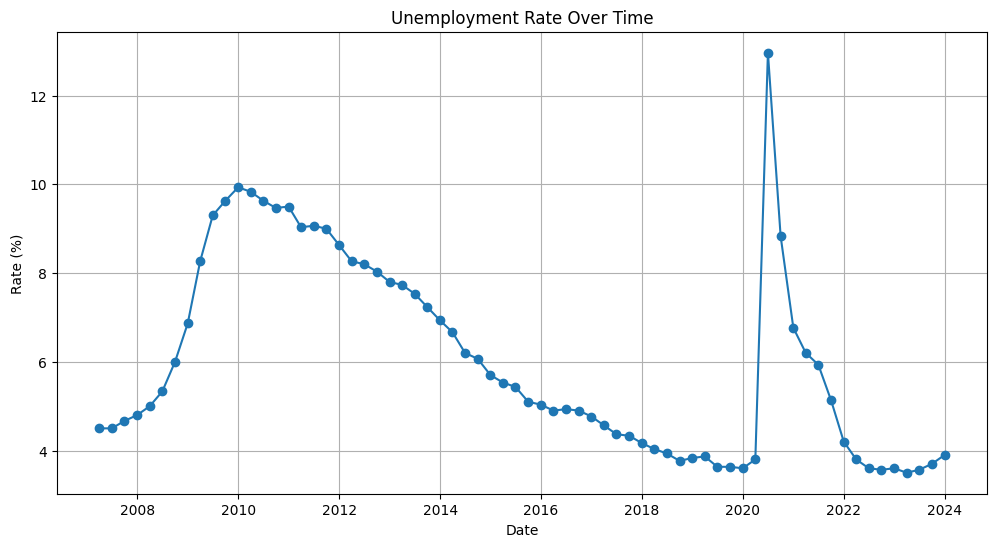

UNRATE    0
dtype: int64

,UNRATE
count,68.000000
mean,6.040196
std,2.234804
min,3.500000
25%,4.133333
50%,5.233333
75%,7.858333
max,12.966667


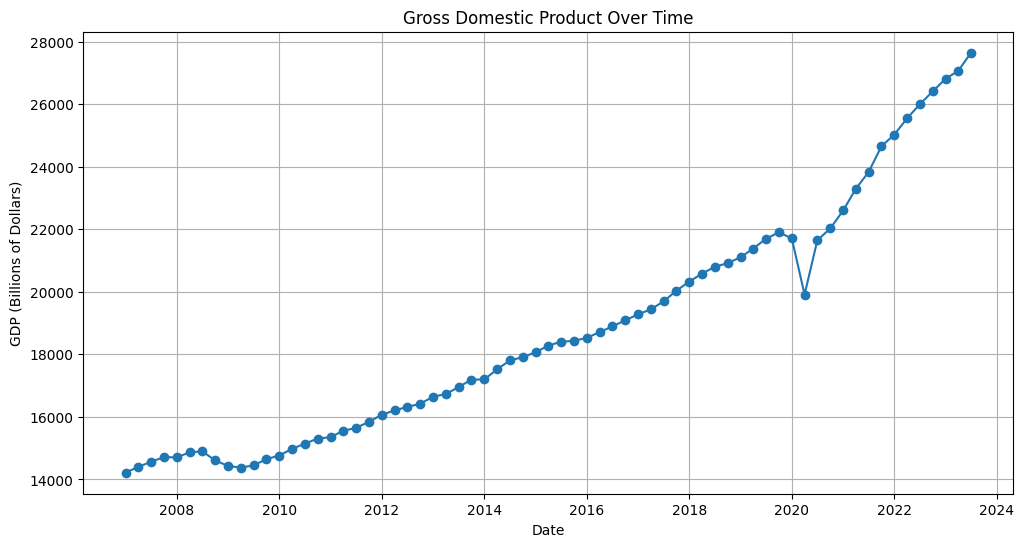

GDP    0
dtype: int64

,GDP
count,67.000000
mean,18808.653896
std,3762.791052
min,14215.651000
25%,15454.493500
50%,18279.784000
75%,21244.454000
max,27644.463000


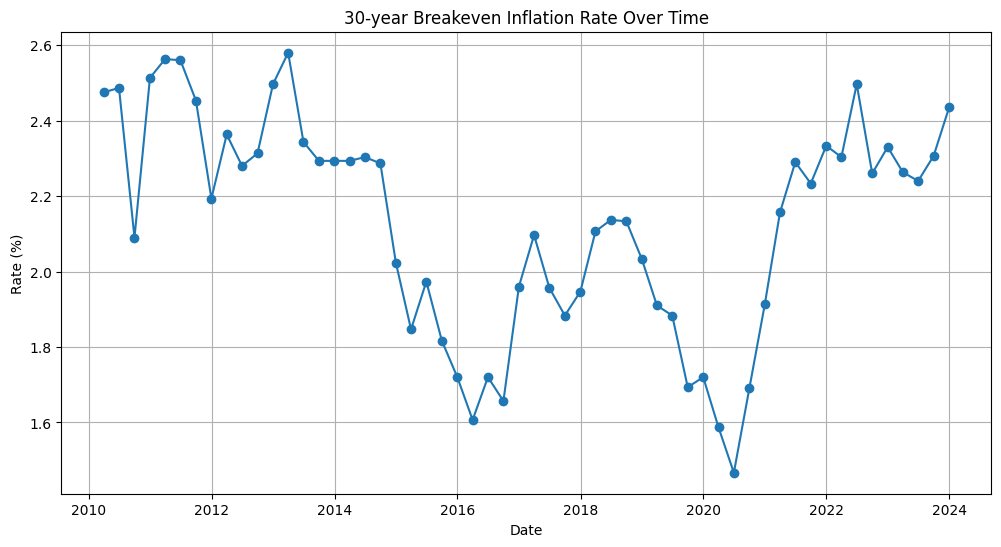

Inflation_Rate    0
dtype: int64

,Inflation_Rate
count,56.000000
mean,2.130536
std,0.289646
min,1.466667
25%,1.912500
50%,2.213333
75%,2.317500
max,2.580000


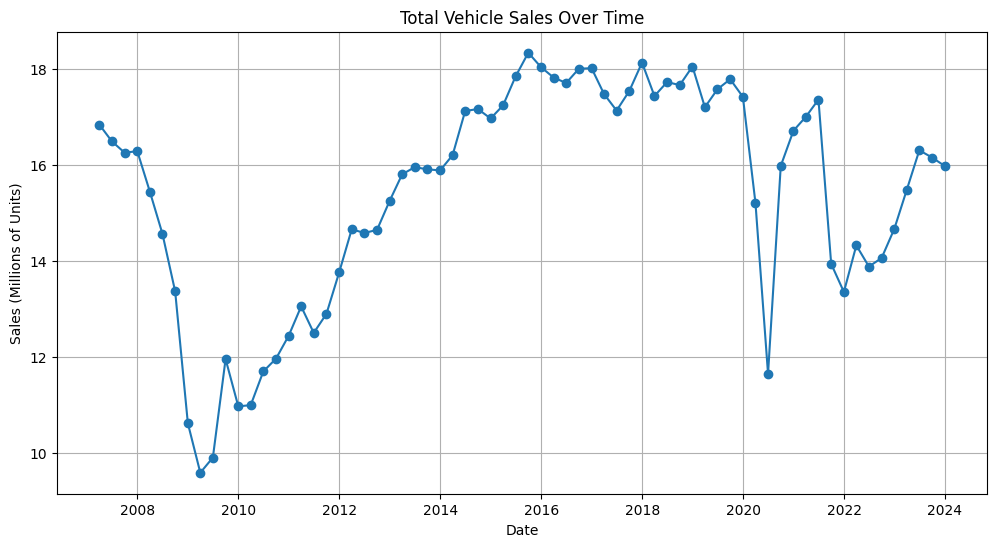

TOTALSA    0
dtype: int64

,TOTALSA
count,68.000000
mean,15.405338
std,2.321183
min,9.585667
25%,13.920000
50%,15.972167
75%,17.368917
max,18.330000


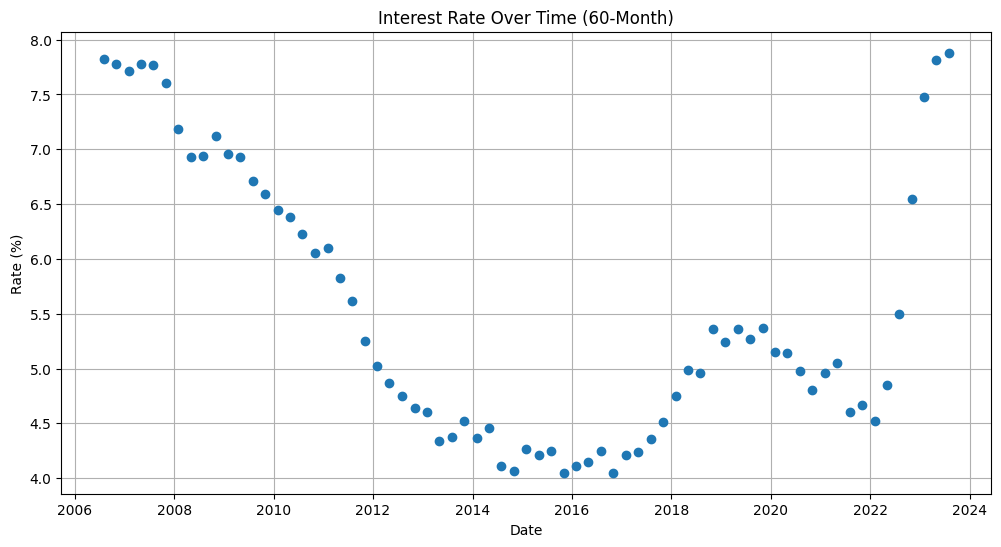

Interest_Rate_60_Month    0
dtype: int64

,Interest_Rate_60_Month
count,69.000000
mean,5.503768
std,1.235553
min,4.050000
25%,4.510000
50%,5.050000
75%,6.550000
max,7.880000


In [14]:
auto_production = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/domestic_auto_production.csv")
auto_inventory = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/domestic_auto_inventories.csv")
federal_fund_rate = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/federal_fund_rate.csv")
unemployment_rate = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/unemployment_rate.csv")
gdp = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/GDP.csv")
inflation_rate = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/inflation_rate.csv")
total_sales = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/total_sales.csv")
interest_rate_60_month = pd.read_csv("C:/Users/patba/Downloads/Time series auto interest rates/interest_rates_60_month.csv")

# Renaming columns for each DataFrame
auto_production = auto_production.rename(columns={'DAUPSA': 'Auto_Production'})
auto_inventory = auto_inventory.rename(columns={'AUINSA': 'Auto_Inventory'})
inflation_rate = inflation_rate.rename(columns={'T30YIEM': 'Inflation_Rate'})
interest_rate_60_month = interest_rate_60_month.rename(columns={'RIFLPBCIANM60NM': 'Interest_Rate_60_Month'})


def clean_data(df, date_col='DATE'):
    """
    Cleans the time series data by converting the date column to datetime format and setting it as the index.
    Also checks for missing values.

    :param df: DataFrame containing the time series data.
    :param date_col: Name of the column containing the date information.
    :return: Cleaned DataFrame and the count of missing values.
    """
    # Convert the date column to datetime format
    df[date_col] = pd.to_datetime(df[date_col])

    # Set the date column as the index of the dataframe
    df.set_index(date_col, inplace=True)

    # Check for missing values
    missing_values = df.isnull().sum()

    return df, missing_values

def visualize_data(df, title, y_label):
    """
    Visualizes the time series data.

    :param df: DataFrame containing the time series data.
    :param title: Title of the plot.
    :param y_label: Label for the Y-axis.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df.iloc[:, 0], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# using the functions with the auto production data
cleaned_auto_prod, missing_values_auto_prod = clean_data(auto_production)
cleaned_auto_prod = cleaned_auto_prod.resample('Q').mean()
visualize_data(cleaned_auto_prod, 'Domestic Auto Production Over Time', 'Production (Thousands of Units)')
display(missing_values_auto_prod, cleaned_auto_prod.describe())  # Display missing values and basic statistics

# auto inventory data
cleaned_auto_inventory, missing_values_auto_inventory = clean_data(auto_inventory)
cleaned_auto_inventory = cleaned_auto_inventory.resample('Q').mean()
visualize_data(cleaned_auto_inventory, 'Domestic Auto Inventories Over Time', 'Inventories (Thousands of Units)')
display(missing_values_auto_inventory, cleaned_auto_inventory.describe())

# federal fund rate data
cleaned_federal_fund_rate, missing_values_federal_fund_rate = clean_data(federal_fund_rate)
cleaned_federal_fund_rate = cleaned_federal_fund_rate.resample('Q').mean()
visualize_data(cleaned_federal_fund_rate, 'Federal Funds Effective Rate Over Time', 'Rate (%)')
display(missing_values_federal_fund_rate, cleaned_federal_fund_rate.describe())  # Display missing values and first few rows

# unemployment rate
cleaned_unemployment_rate, missing_values_unemployment_rate = clean_data(unemployment_rate)
cleaned_unemployment_rate = cleaned_unemployment_rate.resample('Q').mean()
visualize_data(cleaned_unemployment_rate, 'Unemployment Rate Over Time', 'Rate (%)')
display(missing_values_unemployment_rate, cleaned_unemployment_rate.describe()) # Display missing values and first few rows

# GDP data
cleaned_gdp, missing_values_gdp = clean_data(gdp)
visualize_data(cleaned_gdp, 'Gross Domestic Product Over Time', 'GDP (Billions of Dollars)')
display(missing_values_gdp, cleaned_gdp.describe())  # Display missing values and first few rows

# inflation rate data
cleaned_inflation_rate, missing_values_inflation_rate = clean_data(inflation_rate)
cleaned_inflation_rate = cleaned_inflation_rate.resample('Q').mean()
visualize_data(cleaned_inflation_rate, '30-year Breakeven Inflation Rate Over Time', 'Rate (%)')
display(missing_values_inflation_rate, cleaned_inflation_rate.describe())  # Display missing values and first few rows

# total vehicle sales data
cleaned_total_sales, missing_values_total_sales = clean_data(total_sales)
cleaned_total_sales = cleaned_total_sales.resample('Q').mean()
visualize_data(cleaned_total_sales, 'Total Vehicle Sales Over Time', 'Sales (Millions of Units)')
display(missing_values_total_sales, cleaned_total_sales.describe())  # Display missing values and first few rows

# interest rates data
cleaned_interest_rates, missing_values_interest_rates = clean_data(interest_rate_60_month)
cleaned_interest_rates['Interest_Rate_60_Month'] = pd.to_numeric(cleaned_interest_rates['Interest_Rate_60_Month'], errors='coerce')
visualize_data(cleaned_interest_rates, 'Interest Rate Over Time (60-Month)', 'Rate (%)')
display(missing_values_interest_rates, cleaned_interest_rates.describe())

<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">

# Time Series Forecasting Project: Data Overview

## 1. Domestic Auto Production
- **Description**: Shows monthly auto production volumes.
- **Significance**: Higher production can indicate industry growth, possibly affecting auto loan rates.

## 2. Domestic Auto Inventories
- **Description**: Monthly data on the inventory levels of domestic autos.
- **Significance**: Inventory levels can reflect supply and demand dynamics, influencing loan rates.

## 3. Federal Funds Effective Rate
- **Description**: The interest rate at which banks lend to each other, set monthly.
- **Significance**: A key economic indicator that influences overall lending rates, including auto loans.

## 4. Unemployment Rate
- **Description**: Monthly percentage of the unemployed workforce.
- **Significance**: Reflects economic health; higher unemployment might lead to changes in loan rates.

## 5. Gross Domestic Product (GDP)
- **Description**: Quarterly measure of the country's economic output.
- **Significance**: Indicates economic growth. Strong GDP growth might correlate with auto loan interest rates.

## 6. 30-year Breakeven Inflation Rate
- **Description**: Monthly forecasted inflation rate over the next 30 years.
- **Significance**: Long-term inflation expectations can impact long-term loan rates.

## 7. Total Vehicle Sales
- **Description**: Monthly sales of vehicles, providing an insight into the auto market's health.
- **Significance**: Sales trends can influence auto manufacturing and, subsequently, loan rates.

## 8. Finance Rate on Consumer Installment Loans, New Autos 60 Month Loan
- **Description**: Monthly data on the interest rates for 60-month auto loans.
- **Significance**: Directly reflects the trends in auto loan interest rates, central to this analysis.

</div>

In [15]:
# Merge the quarterly datasets
dfs = [cleaned_auto_prod, cleaned_auto_inventory, cleaned_federal_fund_rate,
         cleaned_unemployment_rate, cleaned_inflation_rate, cleaned_total_sales,
         cleaned_interest_rates, cleaned_gdp]

data_merged = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), dfs)

# Handle any missing values that might result from the aggregation
data_merged = data_merged.fillna(method='ffill')

In [16]:
# Model selection with auto_arima
train_data = data_merged.iloc[:-4]  # Leave out the last four quarters for validation
test_data = data_merged.iloc[-4:]  # The last four quarters

print("NaNs in train_data:", train_data.isnull().sum().sum())
print("NaNs in test_data:", test_data.isnull().sum().sum())

NaNs in train_data: 153
NaNs in test_data: 0


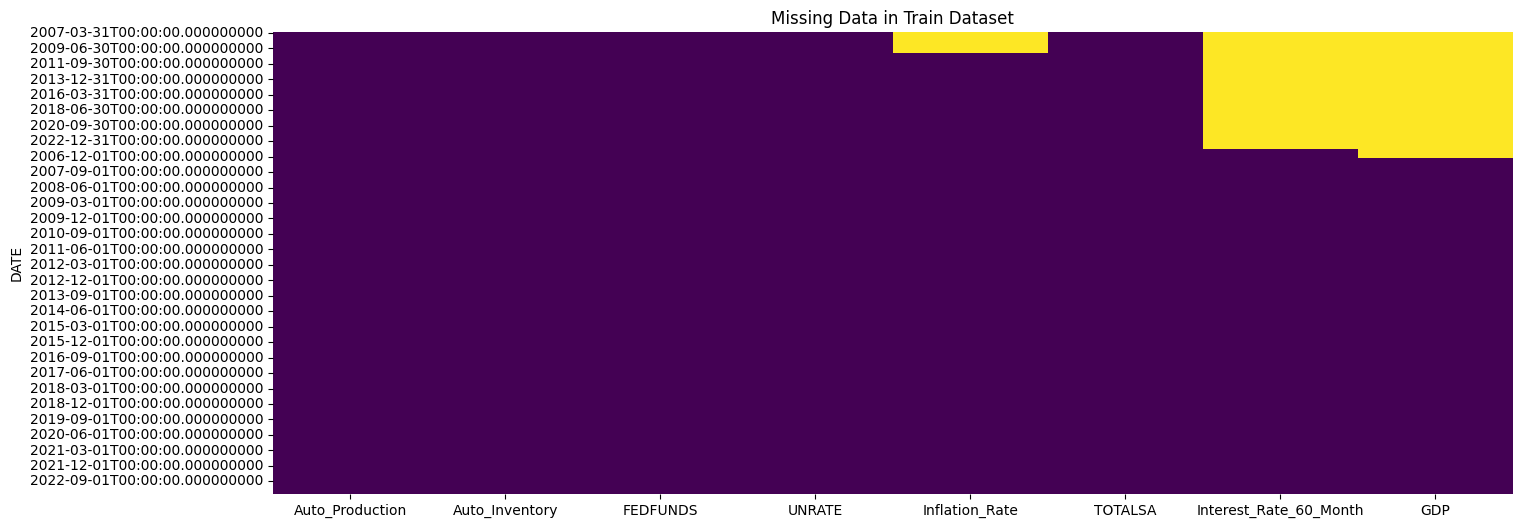

In [17]:
# Create a heatmap to visualize missing data (NaN values)
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Train Dataset')
plt.show()

<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">

**How to Read This Heatmap**

A heatmap is a visual representation of data where values are depicted by color. This particular heatmap shows us the presence of missing data in a dataset over time, across different economic indicators such as Auto Production, Auto Inventory, FEDFUNDS, UNRATE, Inflation Rate, TOTALSA, and GDP.

- The **x-axis** (horizontal) represents different economic indicators.
- The **y-axis** (vertical) represents dates, ranging over several years.
- The colors on the heatmap range from dark purple to bright yellow. **Dark purple** indicates no missing data for that period and indicator, while **bright yellow** shows where data is missing.

In this dataset, the decision was made to backfill the NaN (Not a Number) values, which represent the missing data. Backfilling is a method used to fill in missing data points with the next valid value that comes after the missing one. This is often done when the missing data is at the beginning of the data series, as is the case here.

By filling in these gaps, we can maintain the continuity of the data, which is crucial for analyzing trends over time without being misled by the absence of data.

</div>

In [18]:
# back fill to handle NaN values in the training data
train_data = train_data.fillna(method='bfill')
# Confirm there are no more NaNs in the data
print("Remaining NaNs in train_data after forward filling:", train_data.isnull().sum().sum())

Remaining NaNs in train_data after forward filling: 0


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=3591.017, Time=0.83 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=3781.988, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=3708.731, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=3588.246, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=3589.144, Time=0.05 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=3589.856, Time=0.20 sec
 ARIMA(0,2,1)(0,0,2)[4]             : AIC=3588.711, Time=0.28 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=3588.730, Time=0.13 sec
 ARIMA(0,2,1)(1,0,2)[4]             : AIC=3588.194, Time=0.88 sec
 ARIMA(0,2,1)(2,0,2)[4]             : AIC=3571.358, Time=0.74 sec
 ARIMA(0,2,1)(2,0,1)[4]             : AIC=3586.357, Time=0.32 sec
 ARIMA(0,2,0)(2,0,2)[4]             : AIC=3746.415, Time=0.72 sec
 ARIMA(1,2,1)(2,0,2)[4]             : AIC=inf, Time=0.78 sec
 ARIMA(0,2,2)(2,0,2)[4]             : AIC=3580.681, Time=0.88 sec
 ARIMA(1,2,0)(2,0,2)[4]             : 

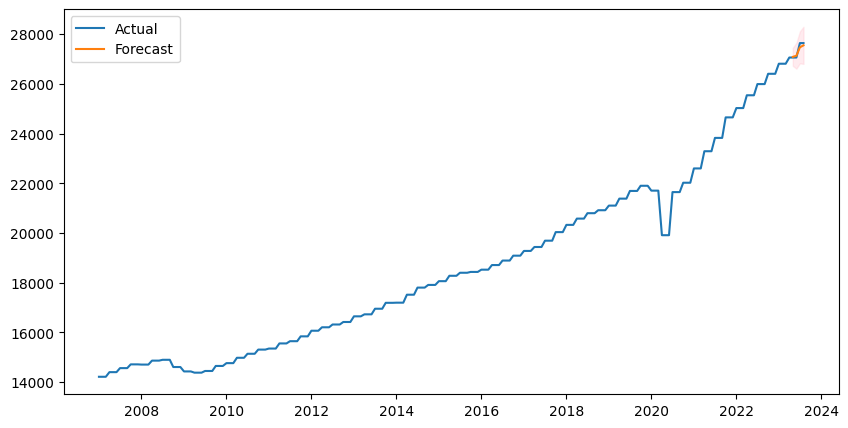

In [19]:
# Fit the model
model = auto_arima(train_data.iloc[:, -1], exogenous=train_data.iloc[:, :-1],
                   seasonal=True, m=4, trace=True)

# Forecast
forecast, conf_int = model.predict(n_periods=4, exogenous=test_data.iloc[:, :-1], return_conf_int=True)

# Evaluate the forecast
print(mean_squared_error(test_data.iloc[:, -1], forecast))
print(r2_score(test_data.iloc[:, -1], forecast))

# Plot the forecast alongside the actual values
plt.figure(figsize=(10, 5))
plt.plot(data_merged.index, data_merged.iloc[:, -1], label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">

### ARIMA Model Summary

The updated Auto ARIMA model fitting has resulted in an ARIMA(0,2,1)(2,0,2)[4] model as the best fit. Let's break down what this means:

- **ARIMA(0,2,1)**: This indicates a non-seasonal ARIMA model with a differencing order of 2 (d=2) and a moving average order of 1 (ma=1). The differencing order of 2 suggests that we performed differencing twice on the original data to make it stationary.

- **(2,0,2)[4]**: This part of the model suggests a seasonal component. It includes a seasonal autoregressive order of 2 (SARIMA) and a seasonal moving average order of 2 (SARIMA). The [4] indicates that there is a seasonal cycle with a period of 4 (quarters, months, etc., depending on your data's frequency).

The inclusion of these components suggests that the model accounts for both non-seasonal and seasonal patterns in the data. The model also includes an intercept term.

### Fit Time

The total time taken to fit the model was **8.072 seconds**, which is a relatively quick computation, considering the complexity of the model.

### Forecast Accuracy

The mean squared error (MSE) of the forecast is **10820.295**, indicating the average squared difference between the estimated values and the actual values. A lower MSE suggests that the model's predictions are closer to the actual values, indicating a better fit.

The R-squared value is **0.872**, which signifies that approximately 87.2% of the variance in the dependent variable is predictable from the independent variables. A higher R-squared value indicates a stronger correlation between the actual and forecasted values.

### Graphical Representation

The accompanying plot displays the actual values (in blue) and the forecasted values (in orange). Additionally, the shaded pink area represents the confidence interval for the forecast. This interval provides a visual understanding of the potential range of predictions, helping to assess the uncertainty associated with the forecast.

</div>


In [20]:
print(data_merged.columns)

Index(['Auto_Production', 'Auto_Inventory', 'FEDFUNDS', 'UNRATE',
       'Inflation_Rate', 'TOTALSA', 'Interest_Rate_60_Month', 'GDP'],
      dtype='object')


In [21]:
# Feature Engineering: Creating lagged variables
for lag in range(1, 4):  # Here we create lags from 1 to 3 periods
    data_merged[f'lag_{lag}'] = data_merged['Interest_Rate_60_Month'].shift(lag)

# Feature Engineering: Creating rolling window statistics
window_size = 4  # A quarter (as data seems to be quarterly)
data_merged['rolling_mean'] = data_merged['Interest_Rate_60_Month'].rolling(window=window_size).mean()
data_merged['rolling_std'] = data_merged['Interest_Rate_60_Month'].rolling(window=window_size).std()

# Drop the NaN values created by lagging and rolling
data_merged = data_merged.dropna()

# Normalization/Standardization: Using StandardScaler for standardization
scaler = StandardScaler()

# Assume that 'exogenous_features' is a list of all your feature columns except the target
exogenous_features = [col for col in data_merged.columns if col not in ['Interest_Rate_60_Month', 'DATE']]

# Fit and transform the data
data_merged[exogenous_features] = scaler.fit_transform(data_merged[exogenous_features])


MSE: 1.4680455838122943e-10


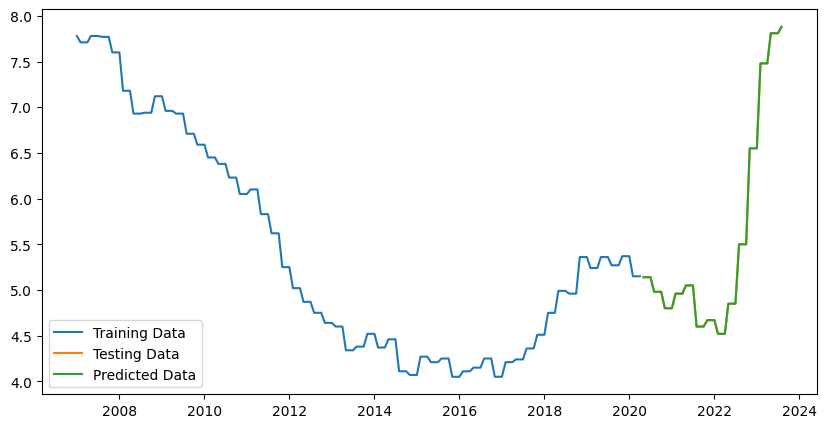

In [22]:
# Dividing the Data into training and testing sets
train_size = int(len(data_merged) * 0.8)
train_data = data_merged.iloc[:train_size]
test_data = data_merged.iloc[train_size:]

# Assuming 'Interest_Rate_60_Month' is your target variable
y_train = train_data['Interest_Rate_60_Month']
X_train = train_data[exogenous_features]
y_test = test_data['Interest_Rate_60_Month']
X_test = test_data[exogenous_features]

# SARIMAX Model Parameters
p = 0  # Non-seasonal AR order
d = 2  # Non-seasonal differencing
q = 1  # Non-seasonal MA order
P = 2  # Seasonal AR order
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA order
S = 4  # Seasonal period

# Assuming you have a SARIMAX model, replace p, d, q, and seasonal_order with appropriate values
model = SARIMAX(y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Evaluation: Predict on the testing set
predictions = results.get_forecast(steps=len(y_test), exog=X_test)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Calculate and print out the metrics
mse = mean_squared_error(y_test, predicted_mean)
print(f'MSE: {mse}')
# You can add more metrics as needed

# Reporting: Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, y_train, label='Training Data')
plt.plot(test_data.index, y_test, label='Testing Data')
plt.plot(test_data.index, predicted_mean, label='Predicted Data')
plt.fill_between(test_data.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">
<p>The Mean Squared Error (MSE) is a common metric used to measure the quality of a statistical or machine learning model. It calculates the average squared difference between the predicted values and the actual values. The squaring is beneficial because it penalizes larger errors more than smaller ones, which can be desirable when large errors are particularly undesirable in the context of a problem.</p>
<p>The MSE score of 1.4680455838122943e-10, is extremely low. This indicates that, on average, the squared difference between the predicted interest rates and the actual interest rates is very close to zero. In practical terms, this suggests that the model's predictions are very accurate with respect to the actual data.</p>
<p>The chart depicts three sets of data:</p>
<ul>
<li><strong>Training Data:</strong> The historical interest rates that the model was trained on. This is the data the model learns from.</li>
<li><strong>Testing Data:</strong> The historical interest rates that were not shown to the model during training. This is used to evaluate how well the model has learned to predict new, unseen data.</li>
<li><strong>Predicted Data:</strong> The interest rates predicted by the model. The accuracy of these predictions is measured against the testing data.</li>
</ul>
<p>The chart is showing the interest rates over time, with different periods designated for training and testing. The fact that the predicted data closely follows the testing data (as evidenced by the low MSE) indicates a good fit by the model.</p>
</div>


In [23]:
def time_series_cv(X, y, model_class, model_params, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mse_scores = []
    mae_scores = []
    mape_scores = []

    for train_index, test_index in tscv.split(X):
        cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
        cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]

        model = model_class(cv_y_train, exog=cv_train, **model_params)
        results = model.fit(disp=0)  # disp=0 turns off debug information

        # Forecast
        forecast = results.get_forecast(steps=len(cv_test), exog=cv_test)
        forecast_mean = forecast.predicted_mean

        # Metrics
        mse = mean_squared_error(cv_y_test, forecast_mean)
        mae = mean_absolute_error(cv_y_test, forecast_mean)
        mape = np.mean(np.abs(forecast_mean - cv_y_test) / np.abs(cv_y_test))  # MAPE calculation

        mse_scores.append(mse)
        mae_scores.append(mae)
        mape_scores.append(mape)

    return mse_scores, mae_scores, mape_scores

# Model parameters for SARIMAX
model_params = {'order': (0, 2, 1), 'seasonal_order': (2, 0, 2, 4)}

# Perform time series cross-validation
mse_scores, mae_scores, mape_scores = time_series_cv(X_train, y_train, SARIMAX, model_params)

print(f'Cross-validated MSE: {np.mean(mse_scores)}')
print(f'Cross-validated MAE: {np.mean(mae_scores)}')
print(f'Cross-validated MAPE: {np.mean(mape_scores)}')

Cross-validated MSE: 9.725424185341536e-12
Cross-validated MAE: 2.1377308525685543e-06
Cross-validated MAPE: 4.5363785036267575e-07


<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">
The output from the <code>time_series_cv</code> function provides cross-validated performance metrics for a time series forecasting model, specifically a SARIMAX model. Cross-validation is crucial in time series analysis due to the sequential nature of the data, which violates the independence assumption of standard cross-validation methods.

<ul>
<li><strong>Cross-validated MSE (Mean Squared Error):</strong> This represents the average of the mean squared errors across all cross-validation folds, with each mean squared error quantifying the average of the squared differences between predicted and actual values. A low MSE across folds, such as the value of <code>9.725424185341536e-12</code> reported, suggests a consistent and highly accurate performance of the model in predicting the test sets within each fold.</li>

<li><strong>Cross-validated MAE (Mean Absolute Error):</strong> This metric averages the mean absolute errors across all folds. The mean absolute error itself is the average of the absolute differences between the predictions and actual values. A low MAE, like the <code>2.1377308525685543e-06</code> observed, implies that the model's predictions are, on average, very close to the actual values in magnitude.</li>

<li><strong>Cross-validated MAPE (Mean Absolute Percentage Error):</strong> The MAPE expresses accuracy as a percentage and is the average of the absolute percentage errors across all folds. A MAPE of <code>4.5363785036267575e-07</code> indicates that, on average, the model's predictions are extremely close to the actual values in percentage terms, providing an interpretable measure of error for stakeholders.</li>
</ul>

In conclusion, the model demonstrates exceptional forecasting performance with minimal errors, as reflected by the cross-validation metrics. These findings suggest that the model can be relied upon for its predictions, provided there is no overfitting and it has been validated on a representative dataset.
</div>


In [24]:
# Define the time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Placeholder for the SARIMAX wrapper compatible with sklearn
class SARIMAXWrapper:
    def __init__(self, order, seasonal_order):
        self.order = order
        self.seasonal_order = seasonal_order
        self.model_ = None

    def fit(self, X, y):
        self.model_ = SARIMAX(y, exog=X, order=self.order, seasonal_order=self.seasonal_order).fit(disp=0)
        return self

    def predict(self, X):
        return self.model_.get_forecast(steps=len(X), exog=X).predicted_mean

# Instantiate the pipeline with the SARIMAX model
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', SARIMAXWrapper(order=(0, 2, 1), seasonal_order=(2, 0, 2, 4)))
])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

print(f'Cross-validated scores: {cross_val_scores}')

Cross-validated scores: [-2.76922187e-11 -9.13258202e-30 -1.20817082e-28 -1.54096304e-10
 -2.88262308e-11]


<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">
<p>The cross-validation process yields a series of scores, each representing the model's performance on a different fold of the data. In this case, the SARIMAX model is wrapped to be compatible with scikit-learn's cross-validation framework. The output shows the negative mean squared error (neg_MSE) for five different splits of the data. The neg_MSE is used in scikit-learn for optimization purposes, where a higher score (closer to zero) is better.</p>
<p>The scores array: <code>[-2.76922187e-11, -9.13258202e-30, -1.20817082e-28, -1.54096304e-10, -2.88262308e-11]</code> indicates the neg_MSE for each of the five folds. Notably, some scores are extremely small (in the order of e-30), which may suggest an almost perfect prediction on those folds or that the variance in the target variable on those folds is nearly zero. Other scores are larger, though still quite small, indicating very accurate predictions with little error.</p>
<p>In summary, these cross-validated scores reflect a highly accurate model in terms of MSE on the given dataset. However, practitioners must also consider the risk of overfitting and ensure that the model is validated against an independent dataset to confirm its predictive power.</p>
</div>

In [13]:
# Resample to quarterly data and forward fill to handle NaN values
y_full = cleaned_interest_rates['Interest_Rate_60_Month'].resample('Q-OCT').ffill()

# Placeholder for exogenous variables (replace with actual exogenous features if available)
X_full = pd.DataFrame(index=y_full.index)
X_full['Exogenous'] = 0

# Fit the SARIMAX model
model = SARIMAX(y_full, exog=X_full, order=(0, 2, 1), seasonal_order=(2, 0, 2, 4))
results = model.fit()

# Prepare future exogenous variables for forecasting
future_exog = pd.DataFrame({'Exogenous': [X_full['Exogenous'].mean()] * 4}, 
                           index=pd.date_range(start=y_full.index[-1] + pd.offsets.QuarterBegin(startingMonth=11), 
                                               periods=4, freq='Q-OCT'))

# Forecast the next 4 quarters
forecast = results.get_forecast(steps=4, exog=future_exog)
forecast_mean = forecast.predicted_mean

# Display the forecasted interest rates
print(f"Forecasted interest rates for the next 4 quarters: {forecast_mean}")

Forecasted interest rates for the next 4 quarters: 2024-01-31    7.994180
2024-04-30    8.108360
2024-07-31    8.222541
2024-10-31    8.336721
Freq: Q-OCT, Name: predicted_mean, dtype: float64


<div style="background-color: #ADD8E6; box-shadow: 0 0 10px rgba(0,0,0,0.5); border-radius: 10px; padding: 20px; margin: 10px;">
<p>The SARIMAX model was fitted on the resampled and forward-filled quarterly data of 60-month interest rates. A placeholder for exogenous variables was created, set to zero for simplicity, as no actual exogenous features were provided. The model's parameters were defined to capture potential seasonal patterns and non-seasonal dynamics in the data.</p>
<p>After fitting the model to the historical data, a forecast was produced for the next four quarters. The exogenous variables for the forecast were prepared by taking the mean of the 'Exogenous' feature from the historical data. The forecasted values are as follows:</p>
<ul>
<li>2024-01-31: 7.994180</li>
<li>2024-04-30: 8.108360</li>
<li>2024-07-31: 8.222541</li>
<li>2024-10-31: 8.336721</li>
</ul>
<p>These forecasted interest rates suggest a steady increase over each quarter. The model predicts a gradual rise, which could be reflective of underlying economic trends, seasonality, or other factors captured by the SARIMAX model. It is important to note that these predictions assume the mean of historical exogenous variables will hold true in the future, which may not necessarily be the case.</p>
</div>
